In [81]:
# mac475의 ipython 표준 style을 적용함
from IPython.core.display import HTML
styles = open("../resources/styles/custom.css", "r").read()
HTML( styles )

#  Pretty Display of Variables를 적용하여 중간 결과를 확인하고자 함
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. 기본적인 작동의 확인

In [41]:
documents = [
    ['왕자', '가', '공주', '를', '좋아한다'],
    ['공주', '가', '왕자', '를', '좋아한다'],
    ['시녀', '가', '왕자', '를', '싫어한다'],
    ['공주', '가', '시녀', '를', '싫어한다'],
    ['시녀', '가', '왕자', '를', '독살한다'],
    ['시녀', '가', '공주', '를', '독살한다']
]

In [42]:
# sum function은 documents내의 list element들을 합쳐줌
words = set(sum(documents, []))

In [43]:
print(words)

{'싫어한다', '좋아한다', '를', '가', '왕자', '시녀', '독살한다', '공주'}


## 2. 영화리뷰 data import

In [80]:
# data reading function
def read_data(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        data = [line.split('\t')[1:] for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data

In [45]:
train_data = read_data('./datasets/ratings_train.txt')

In [46]:
train_data[:5]

[['아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['너무재밓었다그래서보는것을추천한다', '0'],
 ['교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '1']]

In [47]:
test_data = read_data('./datasets/ratings_test.txt')

In [48]:
test_data[:5]

[['굳 ㅋ', '1'],
 ['GDNTOPCLASSINTHECLUB', '0'],
 ['뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아', '0'],
 ['지루하지는 않은데 완전 막장임... 돈주고 보기에는....', '0'],
 ['3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??', '0']]

## 3. tokenizing

In [50]:
# pos tagger 정의, parts of speech : 품사
from konlpy.tag import Twitter
pos_tagger = Twitter()

In [51]:
def tokenize(doc):
    # norm, stem은 optional
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [52]:
from tqdm import tqdm
# tqdm 참고 : https://github.com/tqdm/tqdm#iterable-based

# 원 source는 다음과 같으나, progress 확인을 위해, tqdm을 활용함
# train_docs = [(tokenize(row[0]), row[1]) for row in tqdm(train_data)]

train_docs = [(tokenize(row[0]), row[1]) for row in tqdm(train_data)]

100%|█████████████████████████████████████████████████████████████████████████| 150000/150000 [02:56<00:00, 847.72it/s]


In [54]:
# test_docs = [(tokenize(row[0]), row[1]) for row in test_data]

test_docs = [(tokenize(row[0]), row[1]) for row in tqdm(test_data)]

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:01<00:00, 818.67it/s]


In [56]:
train_docs[0]
test_docs[0]

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증/Noun',
  '나다/Verb',
  '목소리/Noun'],
 '0')

(['굳다/Adjective', 'ㅋ/KoreanParticle'], '1')

In [57]:
# 모든 document내의 pos tagging된 word를 하나의 list에 tokens로 담는다
tokens = [t for d in train_docs for t in d[0]]
len(tokens)

2194536

In [58]:
tokens[3]

'진짜/Noun'

## 4. data exploration

In [59]:
import nltk
text = nltk.Text(tokens, name='NMSC')
print(text)
# => <Text: NMSC>

<Text: NMSC>


In [60]:
len(text.tokens)

2194536

In [61]:
len(set(text.tokens))

48765

In [62]:
text.vocab().most_common(10)

[('./Punctuation', 68630),
 ('영화/Noun', 51365),
 ('하다/Verb', 50281),
 ('이/Josa', 39123),
 ('보다/Verb', 34764),
 ('의/Josa', 30480),
 ('../Punctuation', 29055),
 ('에/Josa', 27108),
 ('가/Josa', 26696),
 ('을/Josa', 23481)]

In [63]:
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

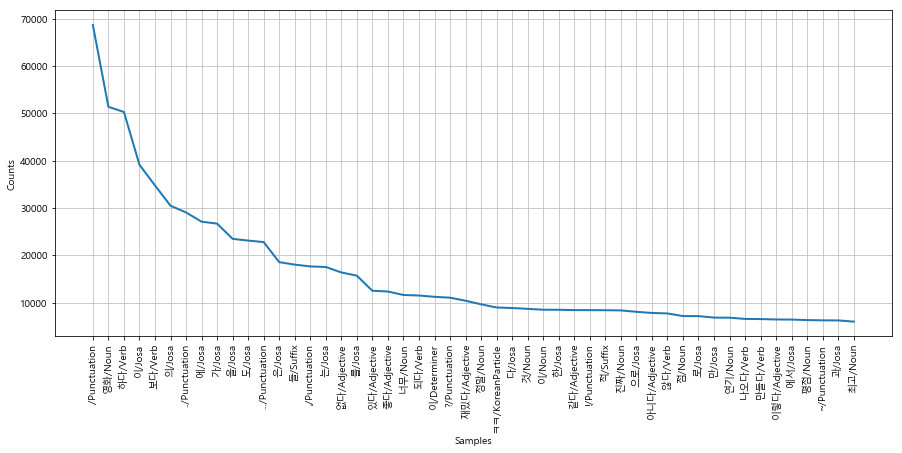

In [64]:
import matplotlib.pyplot as plt
_=plt.figure(figsize=(15, 6))  # the size you want

text.plot(50)

In [65]:
# nltk.download()

In [66]:
# https://stackoverflow.com/questions/3522372/how-to-config-nltk-data-directory-from-code 를 참고

import nltk
nltk.data.path.append("D:/50.work/10.conda.repository/etc/nltk")

In [67]:
text.collocations()

이/Determiner 것/Noun; 적/Suffix 인/Josa; 이/Determiner 거/Noun; 안/Noun
되다/Verb; 것/Noun 은/Josa; 10/Number 점/Noun; 배우/Noun 들/Suffix; 수/Noun
있다/Adjective; 이/Noun 게/Josa; 내/Noun 가/Josa; 최고/Noun 의/Josa; 네/Suffix
요/Josa; 이/Noun 영화/Noun; 끝/Noun 까지/Josa; 들/Suffix 이/Josa; 봐/Noun
도/Josa; 때문/Noun 에/Josa; 적/Suffix 으로/Josa; 사람/Noun 들/Suffix; 영화/Noun
를/Josa


In [68]:
# 여기서는 최빈도 단어 2000개를 피쳐로 사용
# WARNING: 쉬운 이해를 위한 코드이며 time/memory efficient하지 않습니다
selected_words = [f[0] for f in text.vocab().most_common(2000)]

def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}

# 시간 단축을 위한 꼼수로 training corpus의 일부만 사용할 수 있음
train_docs = train_docs[:10000]

train_xy = [(term_exists(d), c) for d, c in train_docs]

In [69]:
selected_words[0]

'./Punctuation'

In [70]:
train_xy[:3]

[({'exists(./Punctuation)': False,
   'exists(영화/Noun)': False,
   'exists(하다/Verb)': False,
   'exists(이/Josa)': False,
   'exists(보다/Verb)': False,
   'exists(의/Josa)': False,
   'exists(../Punctuation)': True,
   'exists(에/Josa)': False,
   'exists(가/Josa)': False,
   'exists(을/Josa)': False,
   'exists(도/Josa)': False,
   'exists(.../Punctuation)': False,
   'exists(은/Josa)': False,
   'exists(들/Suffix)': False,
   'exists(,/Punctuation)': False,
   'exists(는/Josa)': False,
   'exists(없다/Adjective)': False,
   'exists(를/Josa)': False,
   'exists(있다/Adjective)': False,
   'exists(좋다/Adjective)': False,
   'exists(너무/Noun)': False,
   'exists(되다/Verb)': False,
   'exists(이/Determiner)': False,
   'exists(?/Punctuation)': False,
   'exists(재밌다/Adjective)': False,
   'exists(정말/Noun)': False,
   'exists(ㅋㅋ/KoreanParticle)': False,
   'exists(다/Josa)': False,
   'exists(것/Noun)': False,
   'exists(이/Noun)': False,
   'exists(한/Josa)': False,
   'exists(같다/Adjective)': False,
   'exists(

In [71]:
# train_data = 'x'
# test_data = 'x'
# tokens = 'x'
# train_docs = 'x'
# test_docs = 'x'
# train_xy = 'x'
# test_xy = 'x'
# classifier = 'x'

# import gc
# gc.collect()

In [72]:
test_xy = [(term_exists(d), c) for d, c in test_docs]

In [73]:
# naive bayes classifier 적용

classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [74]:
nltk.classify.accuracy(classifier, test_xy)

0.80416

In [75]:
classifier.show_most_informative_features(10)

Most Informative Features
         exists(수작/Noun) = True                1 : 0      =     38.0 : 1.0
         exists(최악/Noun) = True                0 : 1      =     30.1 : 1.0
       exists(♥/Foreign) = True                1 : 0      =     24.5 : 1.0
         exists(노잼/Noun) = True                0 : 1      =     22.1 : 1.0
         exists(낭비/Noun) = True                0 : 1      =     19.5 : 1.0
        exists(쓰레기/Noun) = True                0 : 1      =     19.4 : 1.0
         exists(여운/Noun) = True                1 : 0      =     18.9 : 1.0
        exists(발연기/Noun) = True                0 : 1      =     16.9 : 1.0
          exists(굿/Noun) = True                1 : 0      =     16.9 : 1.0
        exists(최고다/Noun) = True                1 : 0      =     15.9 : 1.0


In [76]:
# https://stackoverflow.com/questions/10017086/save-naive-bayes-trained-classifier-in-nltk 참고

import pickle
f = open('./model/17.10.15.01.naive.bayes.classifier.pickle', 'wb')
pickle.dump(classifier, f)
f.close()

In [77]:
# import pickle
# f = open('my_classifier.pickle', 'rb')
# classifier = pickle.load(f)
# f.close()